In [1]:
import json

# EDA (30 баллов)

Загрузим данные в формате разных библиотек и проведем базовый EDA

In [2]:
import pandas as pd

In [3]:
df = pd.read_parquet(
    "https://gist.githubusercontent.com/martins0n/86ca7e632a57bb1faefa98dc8e467d17/raw/2dfa5e6acf97ae2f6a587fc5e1c629836a8af16b/train.parquet",
    columns=["timestamp", "segment", "target"]
)
df.head()

,timestamp,segment,target
0,2010-01-01,Canada-TechWave-EchoWatch,487.0
1,2010-01-01,Canada-TechWave-ProTab,454.0
2,2010-01-01,Canada-TechWave-CoreX360,212.0
3,2010-01-01,Canada-TechWave-ShadowX,246.0
4,2010-01-01,Canada-GadgetOutlet-QuantumPhone,149.0


## 1. ETNA

`TSDataset` - основной контейнер, с которым работают другие объекты библиотеки

В библиотеке существует 2 стандартных формата данных. Чаще всего данные представлены в **long** формате, в нем датафрэйм должен содержать следующий набор колонок:
1. **timestamp** - колонка с временной отметкой
2. **segment** - колонка с названием временного ряда, которому принадлежит измерение
3. **target** - значение измерения

In [4]:
from etna.datasets import TSDataset

c:\Users\chizh\Desktop\Магистратура\MLOps_course\ml_env\Lib\site-packages\etna\settings.py:35: UserWarning: etna[torch] is not available, to install it, run `pip install etna[torch]`
  warnings.warn("etna[torch] is not available, to install it, run `pip install etna[torch]`")
c:\Users\chizh\Desktop\Магистратура\MLOps_course\ml_env\Lib\site-packages\etna\settings.py:49: UserWarning: etna[chronos] is not available, to install it, run `pip install etna[chronos]`
  warnings.warn("etna[chronos] is not available, to install it, run `pip install etna[chronos]`")
c:\Users\chizh\Desktop\Магистратура\MLOps_course\ml_env\Lib\site-packages\etna\settings.py:64: UserWarning: etna[timesfm] is not available, to install it, run `pip install etna[timesfm]`
  warnings.warn("etna[timesfm] is not available, to install it, run `pip install etna[timesfm]`")
c:\Users\chizh\Desktop\Магистратура\MLOps_course\ml_env\Lib\site-packages\etna\settings.py:72: UserWarning: wandb is not available, to install it, run `p

In [5]:
ts = TSDataset(df=df, freq="D")
ts.head()

segment,Canada-GadgetOutlet-CoreX360,Canada-GadgetOutlet-EchoWatch,Canada-GadgetOutlet-ProTab,Canada-GadgetOutlet-QuantumPhone,Canada-GadgetOutlet-ShadowX,Canada-PremiumDevices-CoreX360,Canada-PremiumDevices-EchoWatch,Canada-PremiumDevices-ProTab,Canada-PremiumDevices-QuantumPhone,Canada-PremiumDevices-ShadowX,...,Singapore-PremiumDevices-CoreX360,Singapore-PremiumDevices-EchoWatch,Singapore-PremiumDevices-ProTab,Singapore-PremiumDevices-QuantumPhone,Singapore-PremiumDevices-ShadowX,Singapore-TechWave-CoreX360,Singapore-TechWave-EchoWatch,Singapore-TechWave-ProTab,Singapore-TechWave-QuantumPhone,Singapore-TechWave-ShadowX
feature,target,target,target,target,target,target,target,target,target,target,...,target,target,target,target,target,target,target,target,target,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2010-01-01,404.0,918.0,828.0,149.0,469.0,476.0,1104.0,1004.0,189.0,604.0,...,520.0,1054.0,996.0,160.0,626.0,203.0,470.0,383.0,73.0,245.0
2010-01-02,390.0,987.0,769.0,140.0,531.0,446.0,1093.0,977.0,167.0,606.0,...,502.0,1158.0,970.0,180.0,610.0,203.0,427.0,397.0,73.0,233.0
2010-01-03,415.0,966.0,883.0,146.0,543.0,506.0,1231.0,968.0,168.0,593.0,...,521.0,1126.0,1155.0,195.0,656.0,228.0,487.0,414.0,75.0,250.0
2010-01-04,323.0,689.0,621.0,118.0,388.0,398.0,856.0,784.0,137.0,521.0,...,421.0,882.0,830.0,136.0,461.0,162.0,384.0,332.0,60.0,190.0
2010-01-05,307.0,708.0,661.0,119.0,388.0,388.0,794.0,793.0,144.0,445.0,...,385.0,767.0,706.0,130.0,481.0,172.0,383.0,345.0,53.0,185.0


Нарисуйте произвольные 4 сегмента

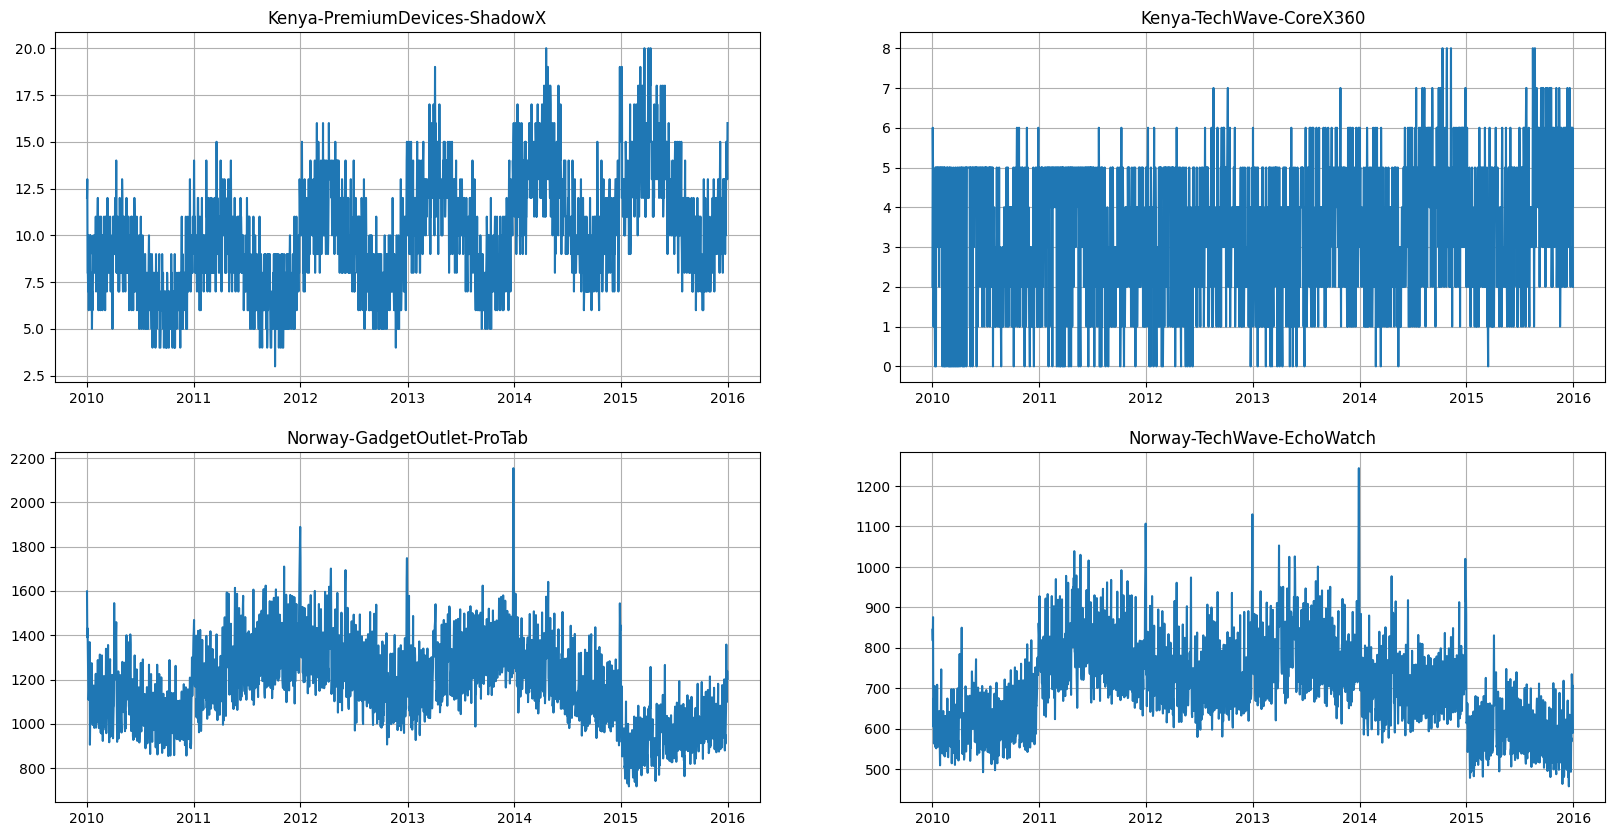

In [6]:
ts.plot(
    n_segments=4
)

## 2. Statsforecast

Формат данных **long**:
- `"unique_id"` -- уникальный айдишник ряда
- `"ds"` -- временная метка
- `"y"` -- значение временного ряда

Тут **нет специального контейнера** для работы с данныхми -- все операции с данными на вашей совести

In [7]:
from statsforecast import StatsForecast

c:\Users\chizh\Desktop\Магистратура\MLOps_course\ml_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
Y_df = df.rename(columns={
    "segment": "unique_id",
    "timestamp": "ds",
    "target": "y"
})
Y_df.head()

,ds,unique_id,y
0,2010-01-01,Canada-TechWave-EchoWatch,487.0
1,2010-01-01,Canada-TechWave-ProTab,454.0
2,2010-01-01,Canada-TechWave-CoreX360,212.0
3,2010-01-01,Canada-TechWave-ShadowX,246.0
4,2010-01-01,Canada-GadgetOutlet-QuantumPhone,149.0


Нарисуйте произвольные 4 сегмента

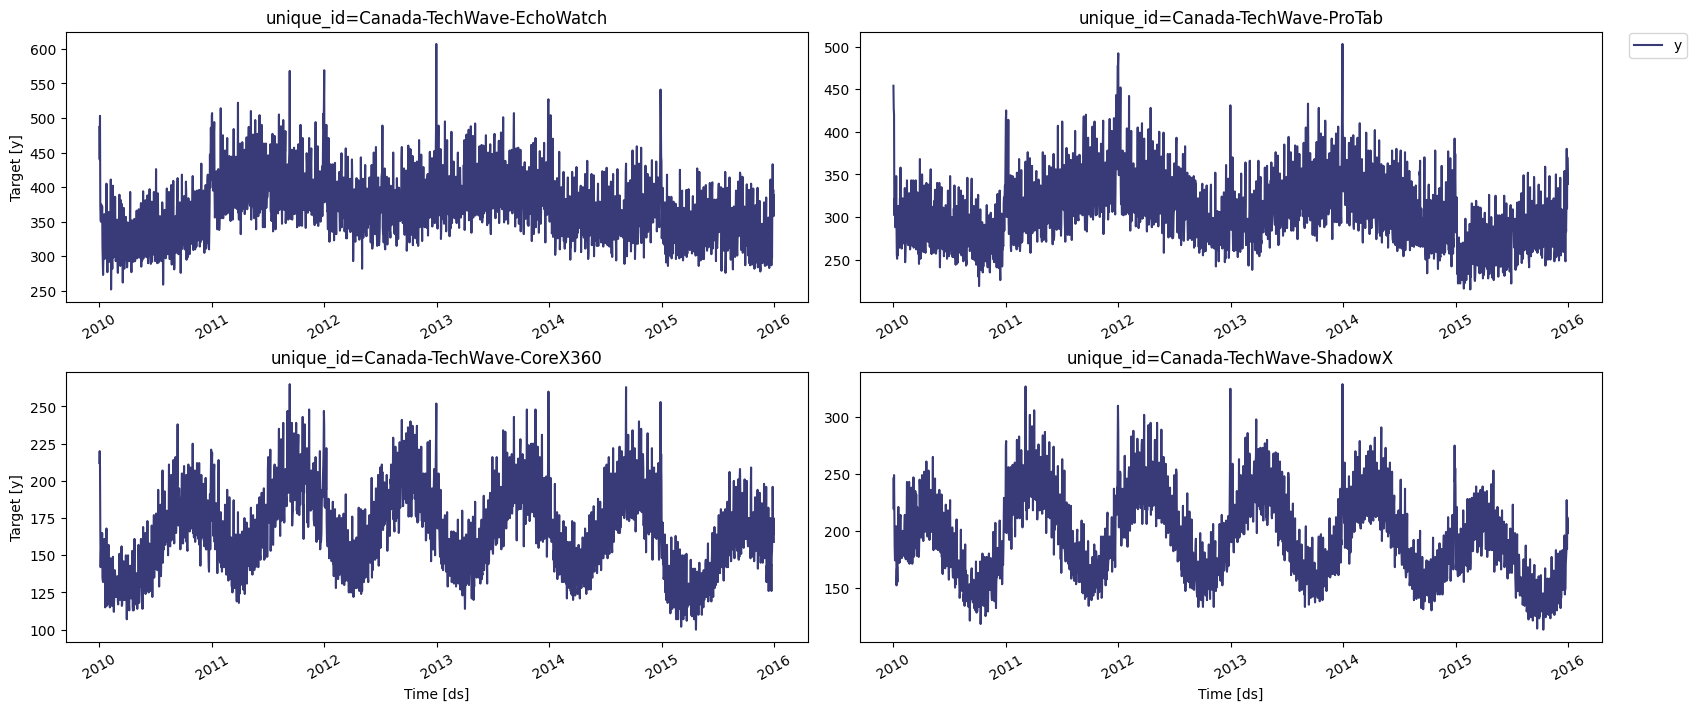

In [9]:
StatsForecast.plot(
    Y_df[Y_df['unique_id'].isin(['Canada-TechWave-EchoWatch', 'Canada-TechWave-ProTab', 'Canada-TechWave-CoreX360', 'Canada-TechWave-ShadowX'])]
)

## 3. Базовый EDA

### 3.1 Базовые характеристики

Определите базовые характеристики датасета, обратите внимание на метод `TSDataset.describe`

In [10]:
desc_table = ts.describe()
desc_table.head()

# desc_table['freq'].unique()
# desc_table['start_timestamp'].min()
# desc_table['end_timestamp'].max()

,start_timestamp,end_timestamp,length,num_missing,num_segments,num_exogs,num_regressors,num_known_future,freq
segments,,,,,,,,,
Canada-GadgetOutlet-CoreX360,2010-01-01,2015-12-31,2191,0,88,0,0,0,D
Canada-GadgetOutlet-EchoWatch,2010-01-01,2015-12-31,2191,0,88,0,0,0,D
Canada-GadgetOutlet-ProTab,2010-01-01,2015-12-31,2191,0,88,0,0,0,D
Canada-GadgetOutlet-QuantumPhone,2010-01-01,2015-12-31,2191,0,88,0,0,0,D
Canada-GadgetOutlet-ShadowX,2010-01-01,2015-12-31,2191,0,88,0,0,0,D


In [11]:
# 15 баллов
result = { 
    "n_segments": len(desc_table), # Количество сегментов в датасете
    "freq": "D", # Частотность данных
    "min_timestamp": "2010-01-01", # Минимальное значение таймстемпов в датасете в формате yyyy-mm-dd
    "max_timestamp": "2015-12-31", # Максимальное значение таймстемпов в датасете в формате yyyy-mm-dd
    "mean_series_length": desc_table['length'].mean(), # Средняя длинна рядов в датасете
}
print(json.dumps(result))

{"n_segments": 88, "freq": "D", "min_timestamp": "2010-01-01", "max_timestamp": "2015-12-31", "mean_series_length": 2191.0}


### 3.2 Сезонности

Определите какие сезонности содержаться в рядах на основе графика автокорреляционной функции.

*Примечания*: 
- В точках, равных периоду сезонности, можно наблюдать пики на графиках
- В ряде может присутствовать несколько сезонностей или сезонности может не быть (период = 1)

In [12]:
from etna.analysis import acf_plot

segments = ["Kenya-PremiumDevices-ShadowX", "Kenya-TechWave-CoreX360"] # Исследование провести для этих сегментов

In [13]:
acf_plot(
    ts,
    lags=400,
    segments=segments,
    figsize=(80, 40)
)

In [14]:
# 15 баллов
# Сезонности в порядке возрастания периода
result = {
    "Kenya-PremiumDevices-ShadowX_seasonality_1": 7,
    "Kenya-PremiumDevices-ShadowX_seasonality_2": 365,
    "Kenya-TechWave-CoreX360_seasonality_1": 1
}
print(json.dumps(result))

{"Kenya-PremiumDevices-ShadowX_seasonality_1": 7, "Kenya-PremiumDevices-ShadowX_seasonality_2": 365, "Kenya-TechWave-CoreX360_seasonality_1": 1}


# Кросс-валидация (50 баллов)

1. Создадим пайплайн для прогнозировния моделью SMA с сезонностью 7 и окном 3
2. Оценим качество пайплайна на отложенной выборке(1 фолд равный горизонту)

In [15]:
HORIZON = 365
N_FOLDS = 1

## 1. ETNA

In [16]:
from etna.pipeline import Pipeline
from etna.models import SeasonalMovingAverageModel
from etna.metrics import SMAPE

Создаем пайплайн прогнозирования

In [17]:
pipeline = Pipeline(
    model=SeasonalMovingAverageModel(window=3, seasonality=7),
    horizon=HORIZON
)

Запускаем кросс-валидацию

In [18]:
backtest_result = pipeline.backtest(
    ts=ts,
    metrics=[SMAPE()],
    n_folds=N_FOLDS
)

# 10 баллов
result = {
    "etna_backtest_smape": backtest_result['metrics']["SMAPE"].mean()
}
print(json.dumps(result))

{"etna_backtest_smape": 26.926958777443442}


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Построим исторические прогнозы для 4 сегментов

In [19]:
from etna.analysis import plot_backtest

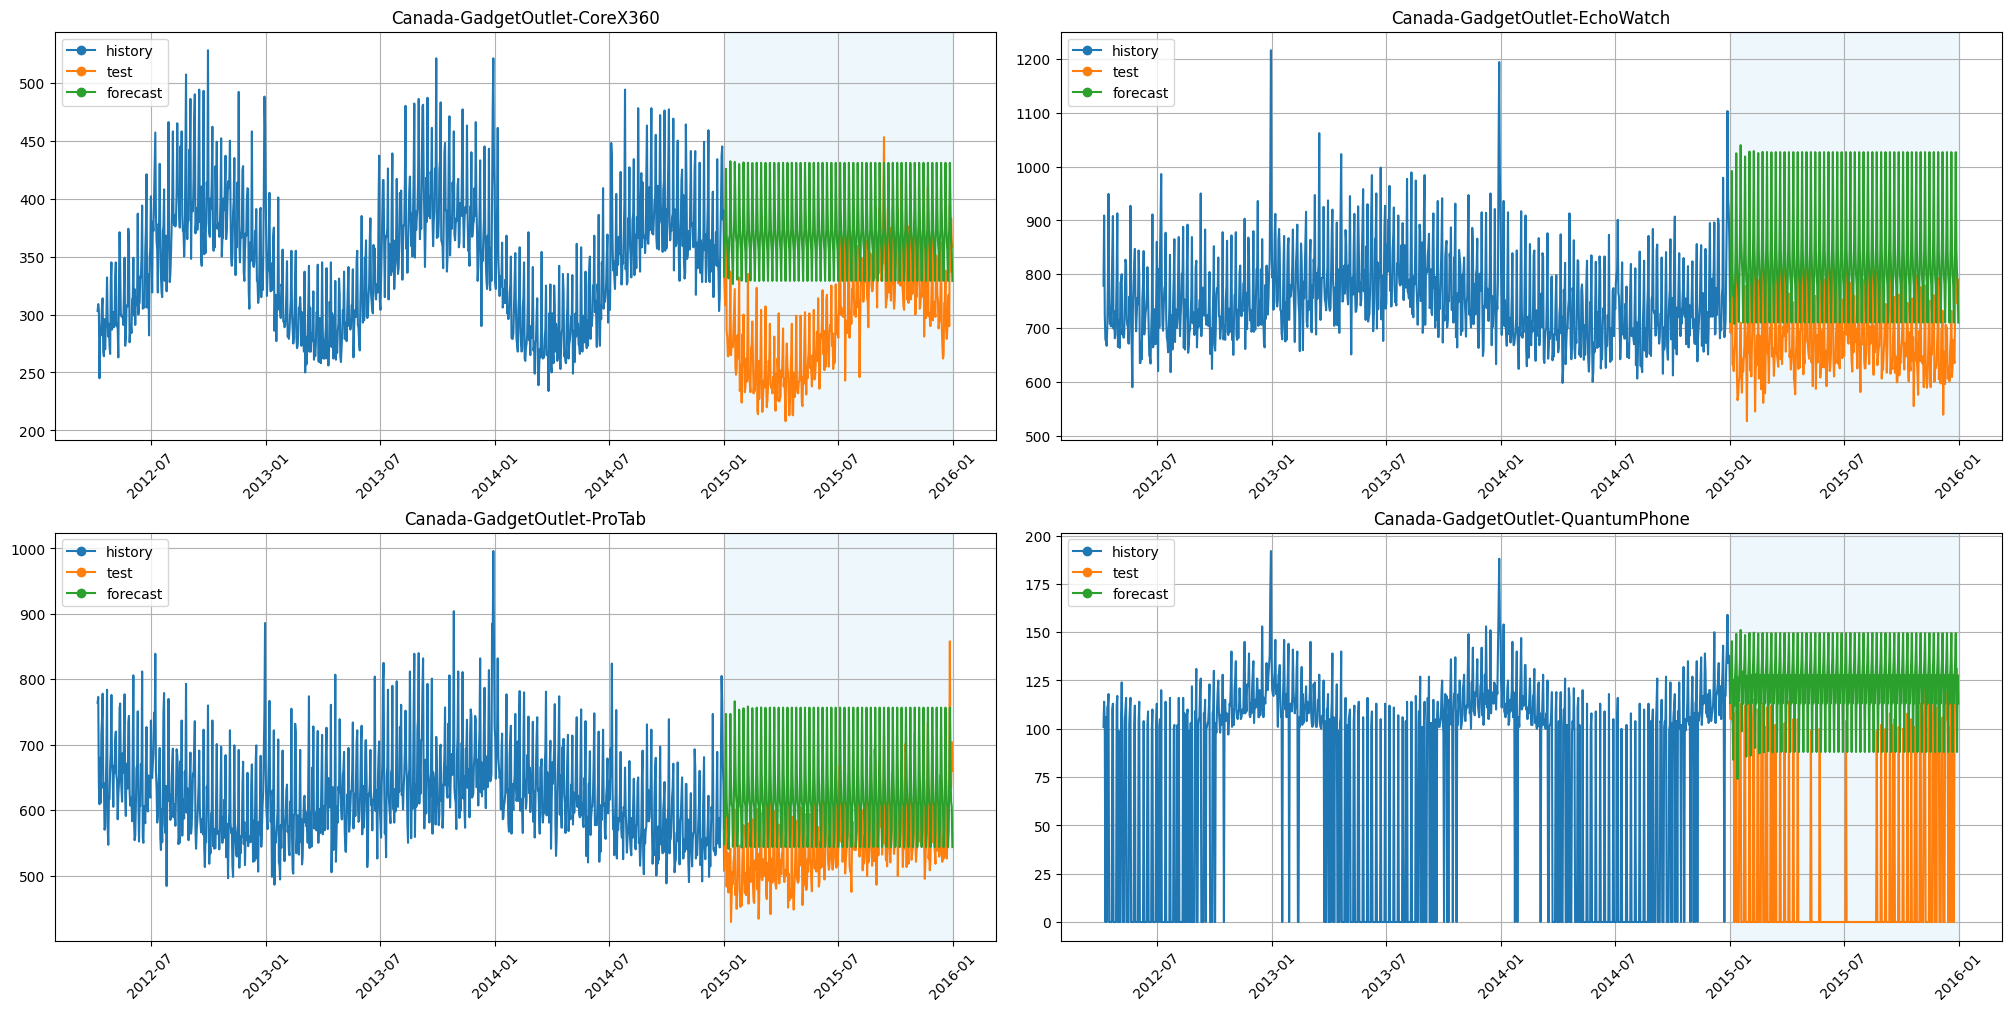

In [20]:
plot_backtest(
    forecast_ts_list=backtest_result['forecasts'],
    ts=ts,
    history_len=1000,
    segments=ts.segments[:4]
)

## 2. Statsforecast

In [21]:
from statsforecast import StatsForecast
from statsforecast.models import SeasonalWindowAverage
from utilsforecast.losses import smape

Создаем пайплайн прогнозирования

In [22]:
sf = StatsForecast( 
    models=[SeasonalWindowAverage(season_length=7, window_size=3)], # Какие модели обучаем
    freq="D", 
    n_jobs=-1, # По рядам
    verbose=True
)

Строим исторические прогнозы

In [23]:
cv_df = sf.cross_validation(
    df=Y_df, # Данные для обучения
    h=HORIZON, # Горизонт прогнозирования
)

Оцениваем метрику качества

In [24]:
# 10 баллов
result = {
    "statsforecast_backtest_smape": smape(cv_df, models=["SeasWA"])["SeasWA"].mean()
}
print(json.dumps(result))

{"statsforecast_backtest_smape": 0.12353417988836385}


Построим исторические прогнозы для 4 сегментов

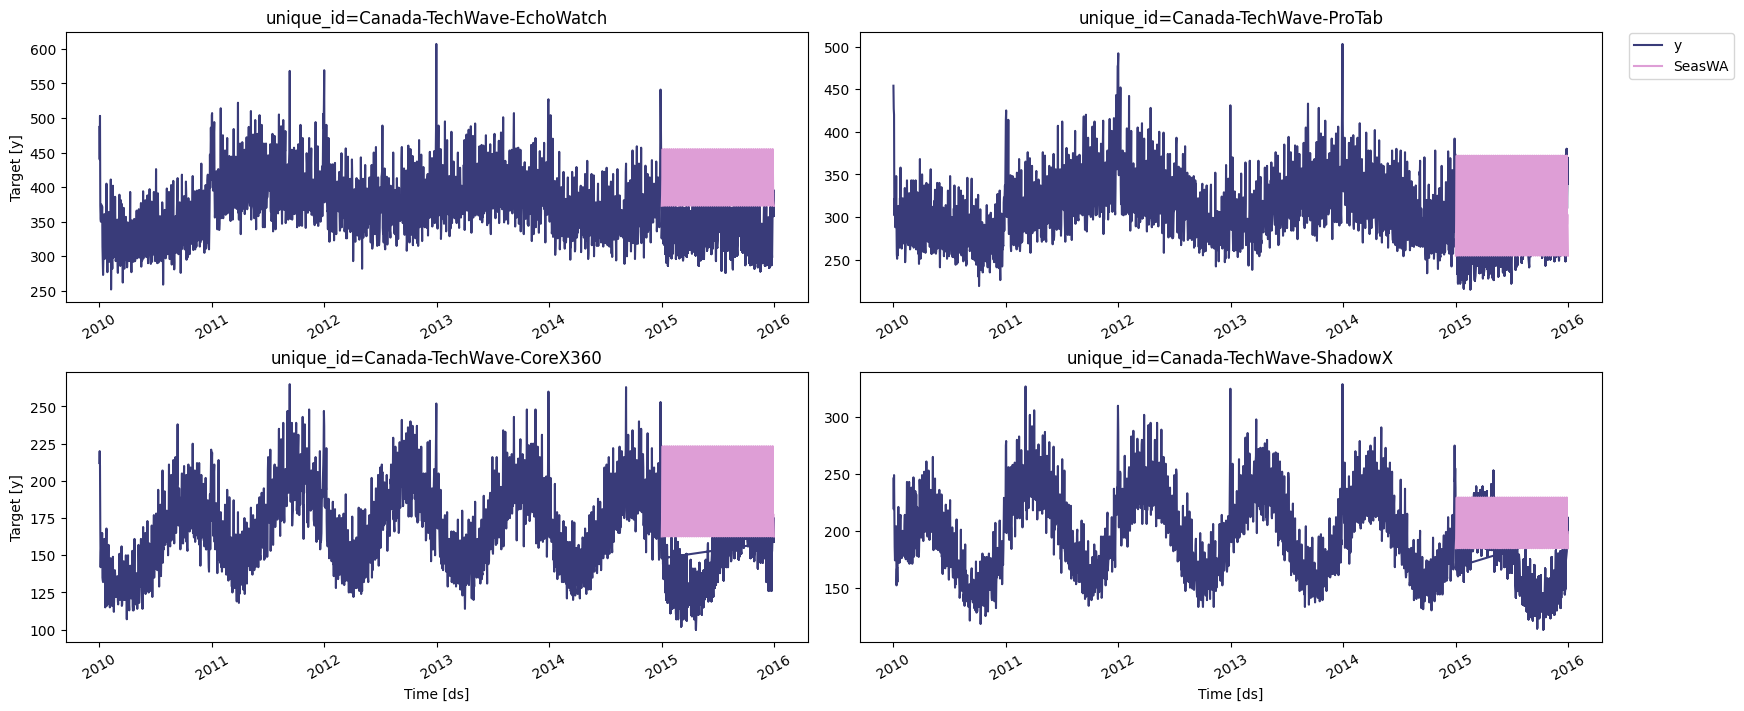

In [25]:
StatsForecast.plot(
    Y_df,
    cv_df,
    unique_ids=['Canada-TechWave-EchoWatch', 'Canada-TechWave-ProTab', 'Canada-TechWave-CoreX360', 'Canada-TechWave-ShadowX'],
    models=['SeasWA']
)

## 2* Фанфакты

Мы вроде как построили одну и ту же модель, использовали одинаковую стратегию валидации и метрику, однако результаты почему-то отличаются, в чем дело?

Дело в том что в зависимости от библиотеки одни и те же методы могут быть реализованы немного по-разному.

В данном случае отличия следующие:
1. Модель -- в ETNA реализован авторегрессионный вариант(при построении прогноза в новой точке могут использовать прогнозы предыдущих точек), тогда как в Statsforecast для построения прогнозов используются последние известные значения ряда
2. Метрика -- метрики отличаются на константу нормализации( 200 x smape(sf) = smape(etna) )

Из-за таких особенностей реализации мы и получаем различия в метриках на кросс-валидации

In [26]:
import numpy as np

sample_segment = "Canada-GadgetOutlet-CoreX360"

# Подставим прогнозы из ETNA пайпалйна
cv_df_etna = cv_df.query("unique_id==@sample_segment")
cv_df_etna["SeasWA"] = backtest_result["forecasts"][0][:, sample_segment, "target"].values

# Оценим метрики на сегменте с одинаковыми прогнозами
smape_etna = backtest_result['metrics'].query("segment==@sample_segment")["SMAPE"][0]
smape_sf = smape(cv_df_etna, models=["SeasWA"])["SeasWA"]

np.testing.assert_allclose(smape_etna, 200 * smape_sf)

C:\Users\chizh\AppData\Local\Temp\ipykernel_24448\94502830.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_df_etna["SeasWA"] = backtest_result["forecasts"][0][:, sample_segment, "target"].values


## 3. Ваша модель

Попробуйте улучшить прогноз подобрав более оптимальные параметры модели.

Для получения баллов необходимо получить метрики лучше, чем у базовый моделей

In [27]:
custom_pipeline = Pipeline(
    model=SeasonalMovingAverageModel(window=14, seasonality=14),
    horizon=HORIZON
)
backtest_result = custom_pipeline.backtest(
    ts=ts,
    metrics=[SMAPE()],
    n_folds=N_FOLDS
)

# 15 баллов
result = {
    "custom_backtest_smape": backtest_result['metrics']["SMAPE"].mean()
}
print(json.dumps(result))
# было: 26.926958777443442

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{"custom_backtest_smape": 20.17900020844771}


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [28]:
custom_sf = StatsForecast( 
    models=[SeasonalWindowAverage(season_length=14, window_size=14)], # Какие модели обучаем
    freq="D", 
    n_jobs=-1, # По рядам
    verbose=True
)
cv_df = custom_sf.cross_validation(
    df=Y_df, # Данные для обучения
    h=HORIZON, # Горизонт прогнозирования
)

# 15 баллов
result = {
    "custom_backtest_smape": smape(cv_df, models=["SeasWA"])["SeasWA"].mean()
}
print(json.dumps(result))
# было: 0.12353417988836385

{"custom_backtest_smape": 0.09672313154795252}


# Построение прогнозов (20 балла)

Построим пронозы базовой модели SMA(seasonality=7, window=3), использую разные фрэймворки

## 1. ETNA

In [29]:
from etna.analysis import plot_forecast

Обучите пайплайн и постройте прогнозы

In [30]:
pipeline = Pipeline(
    model=SeasonalMovingAverageModel(window=3, seasonality=7),
    horizon=HORIZON # + 1 # 2016 был високосным
)
pipeline.fit(ts)
forecast_ts = pipeline.forecast(ts)

Нарисуйте прогнозы для 4 сегментов

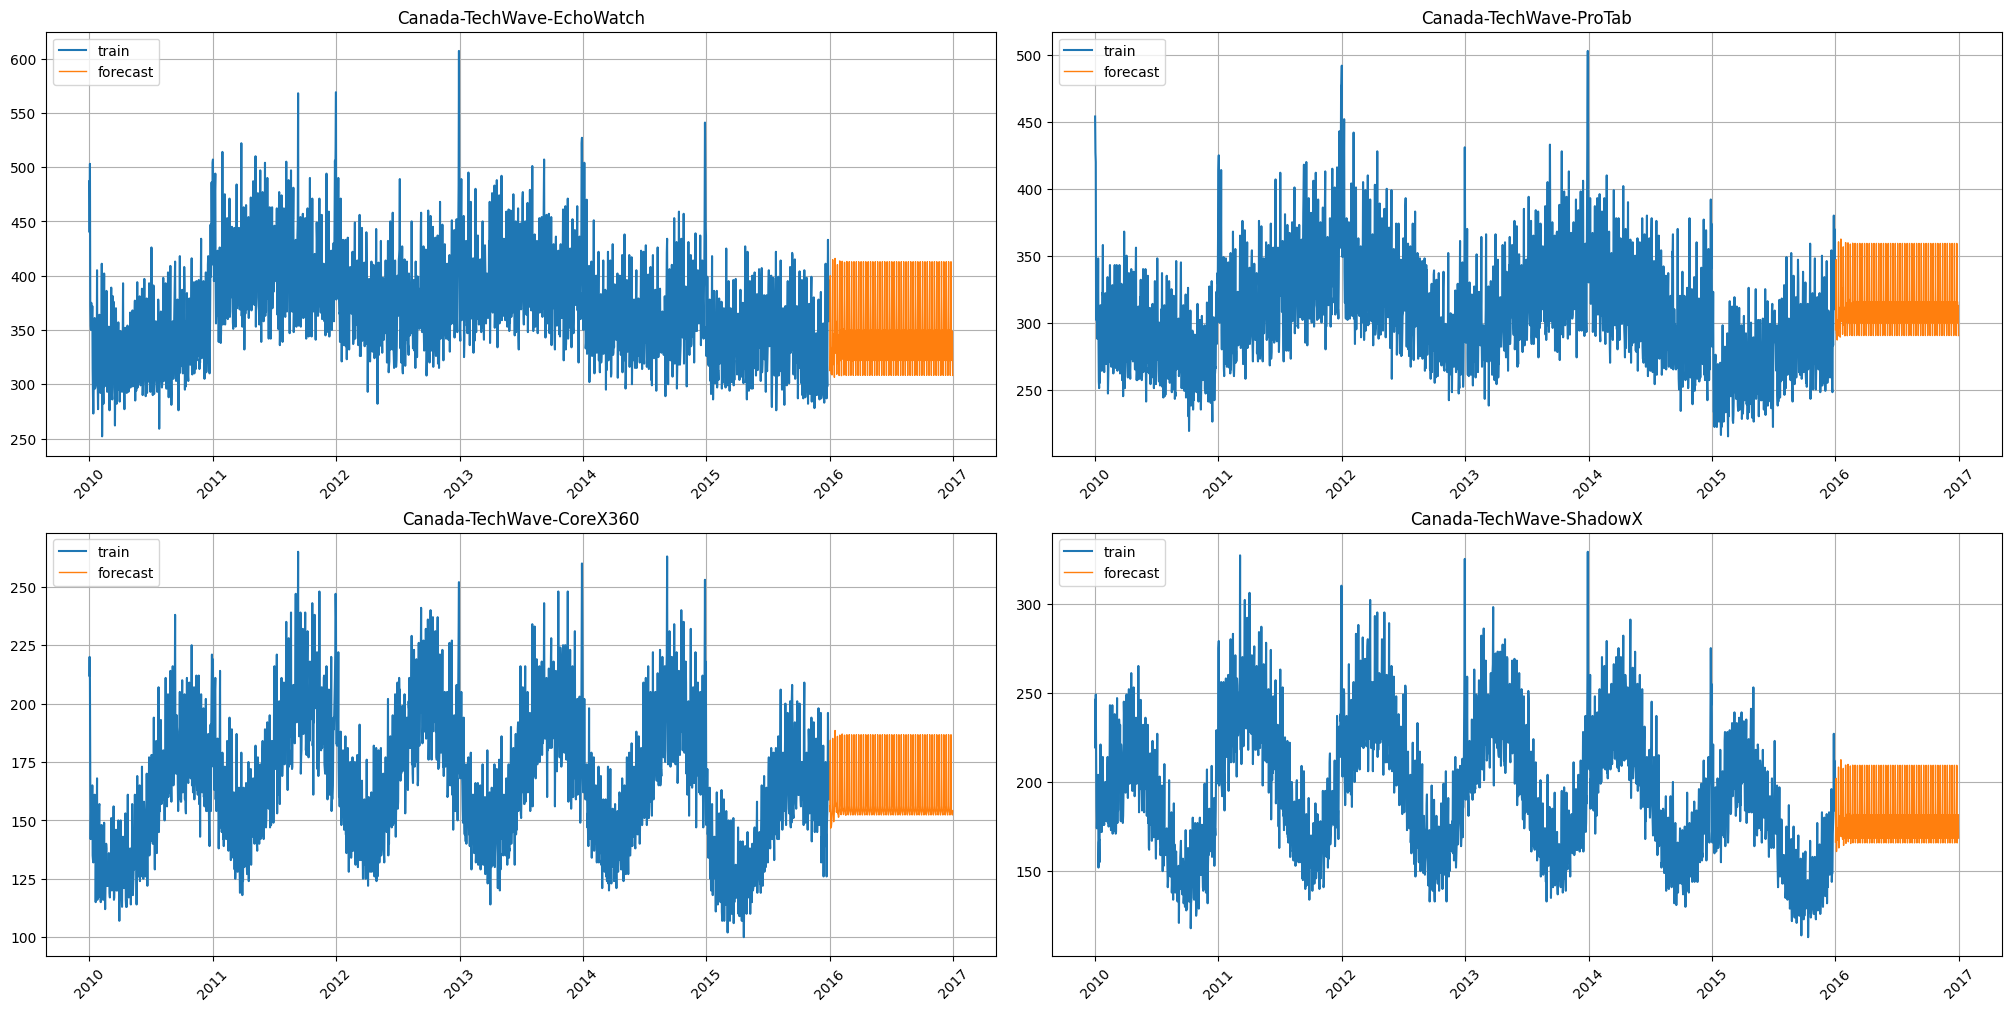

In [31]:
plot_forecast(
    forecast_ts,
    train_ts=ts,
    segments=['Canada-TechWave-EchoWatch', 'Canada-TechWave-ProTab', 'Canada-TechWave-CoreX360', 'Canada-TechWave-ShadowX']
)

Приведите прогнозы к long формату(формат сабмита в соревновании) -- обратите внимание на метод `TSDatast.to_pandas`

In [32]:
forecast_df = forecast_ts.to_pandas(flatten=True)
forecast_df.head()

,timestamp,segment,target
0,2016-01-01,Canada-GadgetOutlet-CoreX360,307.666667
1,2016-01-02,Canada-GadgetOutlet-CoreX360,306.000000
2,2016-01-03,Canada-GadgetOutlet-CoreX360,364.666667
3,2016-01-04,Canada-GadgetOutlet-CoreX360,305.666667
4,2016-01-05,Canada-GadgetOutlet-CoreX360,312.000000


In [33]:
# 10 баллов
result = {
    "etna_forecast_mean": forecast_df["target"].mean()
}
print(json.dumps(result))

{"etna_forecast_mean": 372.8319236889443}


## 2. Statsfrecast

Обучите пайплайн и постройте прогнозы

In [34]:
forecast_df_sf = sf.forecast(
    df=Y_df, # Данные для обучения
    h=HORIZON # + 1, # Горизонт прогнозирования (2016 был високосным годом)
)
forecast_df_sf.head()

Forecast: 100%|██████████| 88/88 [Elapsed: 00:07]


,unique_id,ds,SeasWA
0,Canada-GadgetOutlet-CoreX360,2016-01-01,307.666667
1,Canada-GadgetOutlet-CoreX360,2016-01-02,306.000000
2,Canada-GadgetOutlet-CoreX360,2016-01-03,364.666667
3,Canada-GadgetOutlet-CoreX360,2016-01-04,305.666667
4,Canada-GadgetOutlet-CoreX360,2016-01-05,312.000000


In [35]:
# 10 баллов
result = {
    "statsforecast_forecast_mean": forecast_df_sf["SeasWA"].mean()
}
print(json.dumps(result))

{"statsforecast_forecast_mean": 361.5936903279369}


Нарисуйте прогнозы для 4 сегментов

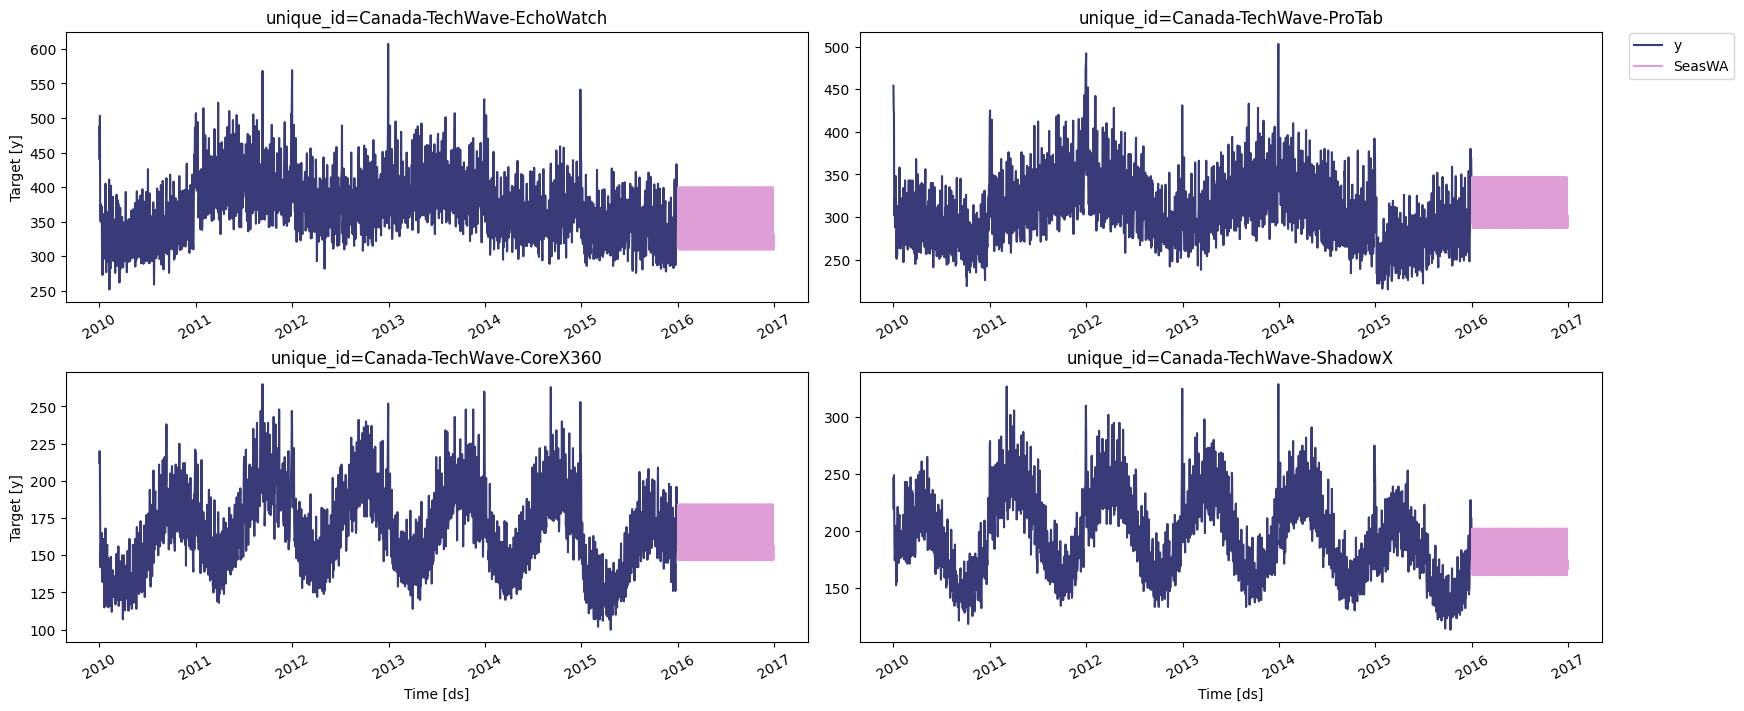

In [36]:
sf.plot(
    Y_df,
    forecast_df_sf,
    unique_ids=['Canada-TechWave-EchoWatch', 'Canada-TechWave-ProTab', 'Canada-TechWave-CoreX360', 'Canada-TechWave-ShadowX'],
)